# Energy Consumption Dataset


# 1. Import Libraries

Mengimport Libraries yang dibutuhkan seperti
- pandas, numpy, seaborn, dan matplotlib untuk melakukan analisis data
- skicit learn untuk melakukan processing data, splitting data, dan algoritma machine learning seperti SVR, RandomForest, dan GradientBoosting, lalu metrics untuk mengetahui hasil apakah algoritma bagus atau tidak
- XGBoost dan LightGBM untuk algoritma machine learning yang dijalankan

In [99]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay

# 2. Data Understanding

1. Loading Data
Tujuannya untuk memuat data, mengeksplorasi tipe data, dan melihat angka seperti mean, quantil untuk dilakukan pemrosesan lebih lanjut saat cleaning data

In [100]:
#Loading dataset
df = pd.read_csv('Energy_consumption.csv')
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


# 3. Exploratory Data Analysis - Deskripsi Variabel

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [102]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


Dari data yang disajikan terdapat 1000 kolom dan tidak terdapat missing value dan tidak ada anomali di dalam data seperti nilai yang sangat tinggi atau data yang tidak masuk akal

## deteksi missing value dan duplikasi

In [103]:
#Deteksi Missing Values dan Duplikasi
print("Missing values per column:")
print(df.isnull().sum())
print("Duplicate rows:")
print(df.duplicated().sum())

Missing values per column:
Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64
Duplicate rows:
0


Dari data yang disajikan diatas tidak terdapat missing value atau duplikasi yang berarti data sudah sangat bersih

## deteksi outliers

In [104]:
#Deteksi Outliers
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')


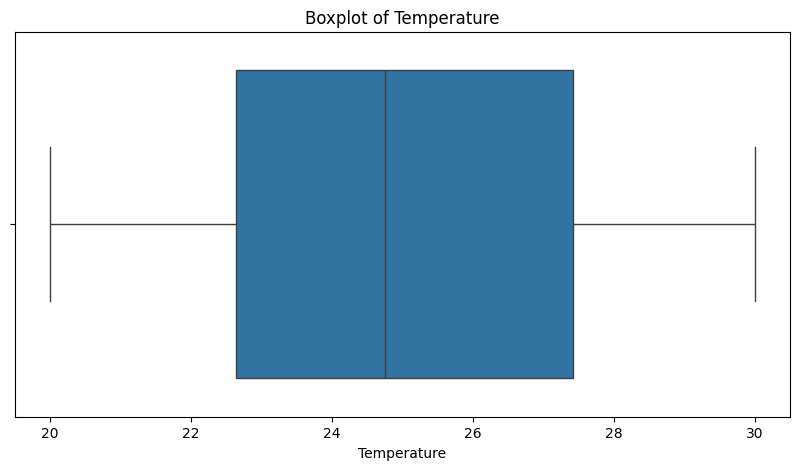

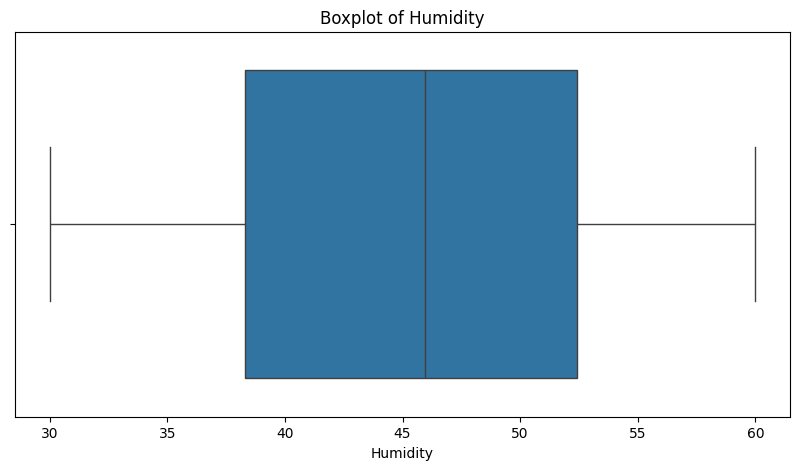

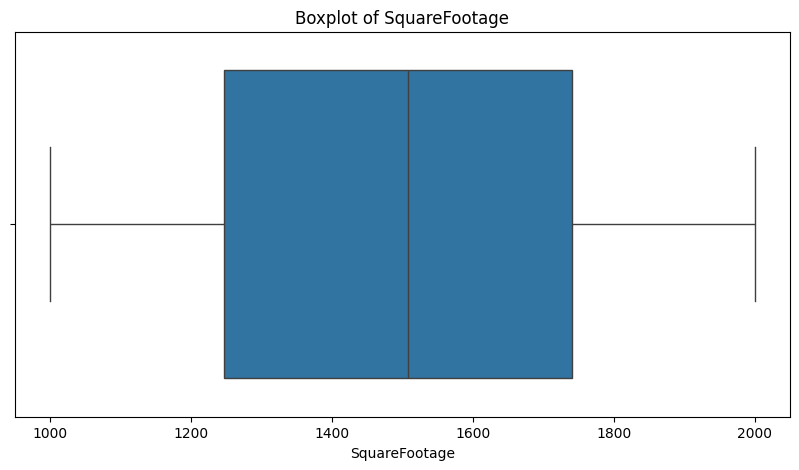

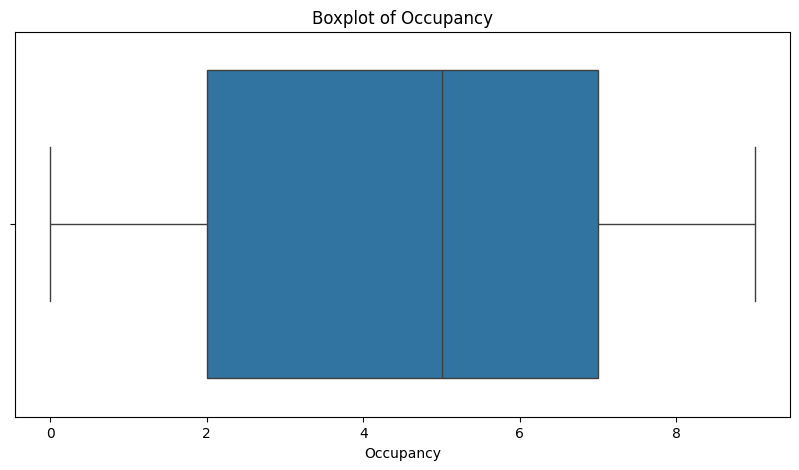

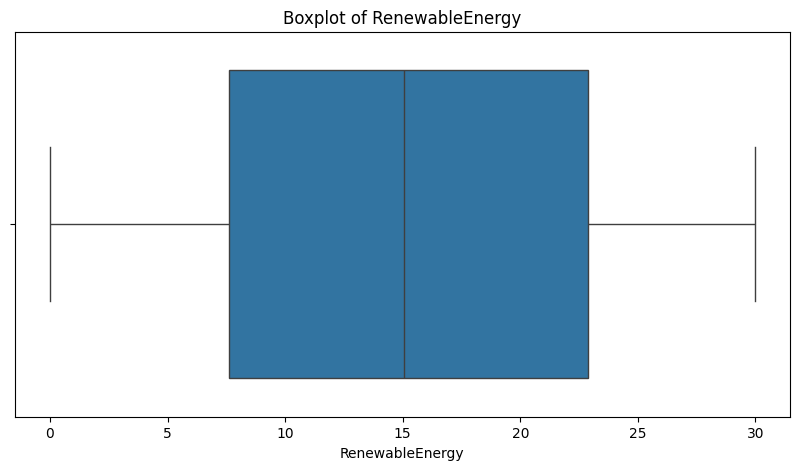

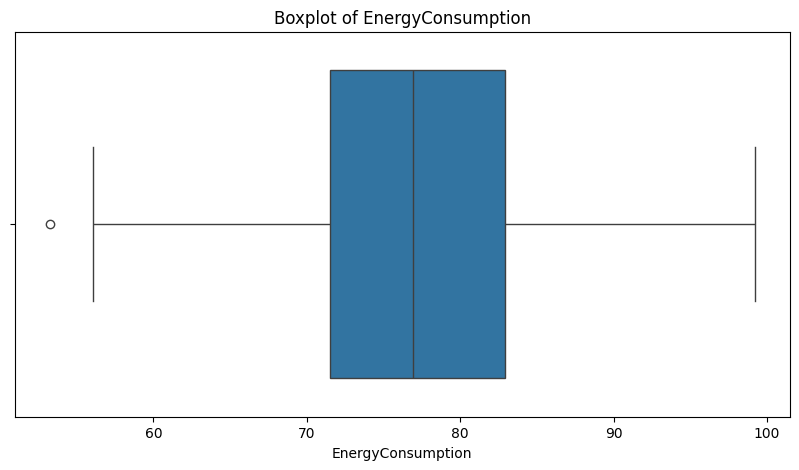

In [105]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

dari data understanding diketahui bahwa data sudah sangat bersih terutama dari duplikasi atau missing value, akan tetapi ada data yang yang masih salah tipe data seperti timestamp yang seharusnya memiliki tipe data waktu, dan terdapat outlier pada energy consumption

# 4. Exploratory Data Analysis - Univariate Analysis

Sebelum melakukan ekstrasi timestamp perlu diketahui timestamp memiliki kesalahan tipe data oleh karena itu harus di ganti menjadi datetime

Melakukan pemisahan data pada timestamp agar mengetahui apakah ada faktor tambahan seperti tahun,bulan atau jam. Hari tidak dimasukan karena sudah merupakan fitur bawaan dari dataset

In [106]:
#Mengubah Object ke Datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          1000 non-null   datetime64[ns]
 1   Temperature        1000 non-null   float64       
 2   Humidity           1000 non-null   float64       
 3   SquareFootage      1000 non-null   float64       
 4   Occupancy          1000 non-null   int64         
 5   HVACUsage          1000 non-null   object        
 6   LightingUsage      1000 non-null   object        
 7   RenewableEnergy    1000 non-null   float64       
 8   DayOfWeek          1000 non-null   object        
 9   Holiday            1000 non-null   object        
 10  EnergyConsumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 86.1+ KB


In [107]:
#pemisahan Timestamp menjadi beberapa kolom tambahan
df['hour'] = df['Timestamp'].dt.hour
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hour,month,year
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,0,1,2022
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,2022
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2,1,2022
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,3,1,2022
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,4,1,2022


# Eksplorasi Data Kategorikal
Eksplorasi Data Kategorikal untuk mencari Frekuensi dari data kategorikal

In [108]:
nums_features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy','RenewableEnergy', 'EnergyConsumption','hour', 'month', 'year']
cat_features = ['Holiday', 'DayOfWeek', 'HVACUsage', 'LightingUsage']

pemisihan fitur kategorikal dan numerikal bertujuan untuk memudahkan eksplorasi data

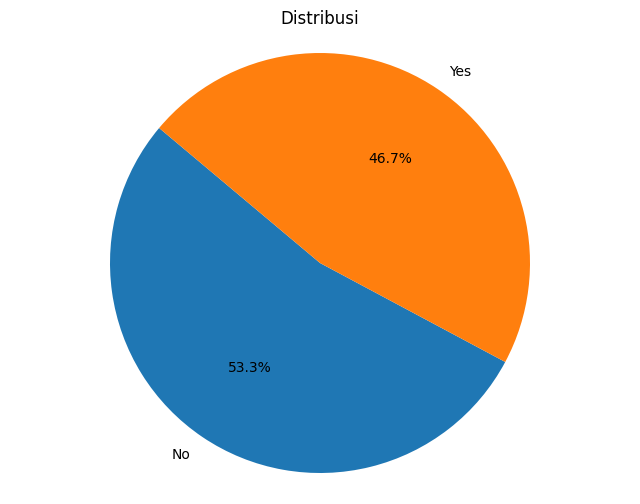

In [109]:
#Frekuensi Data Kategorikal Holiday
plt.figure(figsize=(8, 6))
plt.pie(df[cat_features[0]].value_counts(normalize=True), labels=df[cat_features[0]].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribusi')
plt.axis('equal')
plt.show()

<Axes: title={'center': 'DayOfWeek'}, xlabel='DayOfWeek'>

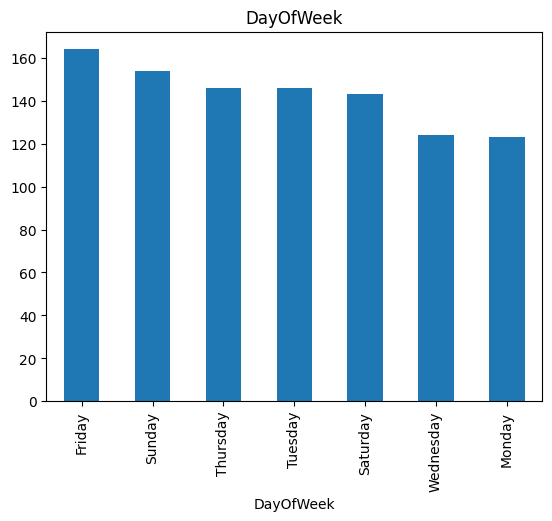

In [110]:
#Category Feature Day of Week
feature = cat_features[1]
count = df[feature].value_counts()
count.plot(kind='bar', title=feature)

<Axes: title={'center': 'HVACUsage'}, xlabel='HVACUsage'>

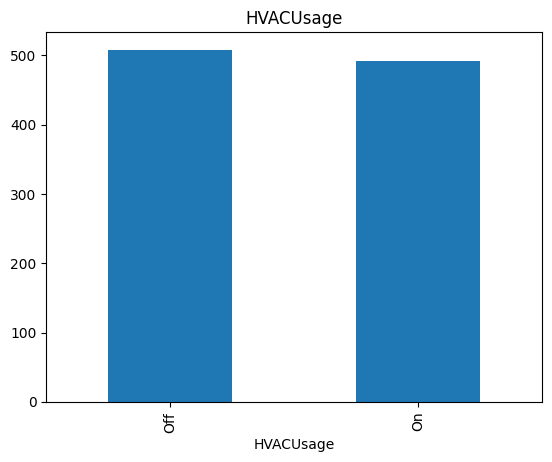

In [111]:
#Cateogry Feature HVAC Usage
feature = cat_features[2]
count = df[feature].value_counts()
count.plot(kind='bar', title=feature)

<Axes: title={'center': 'LightingUsage'}, xlabel='LightingUsage'>

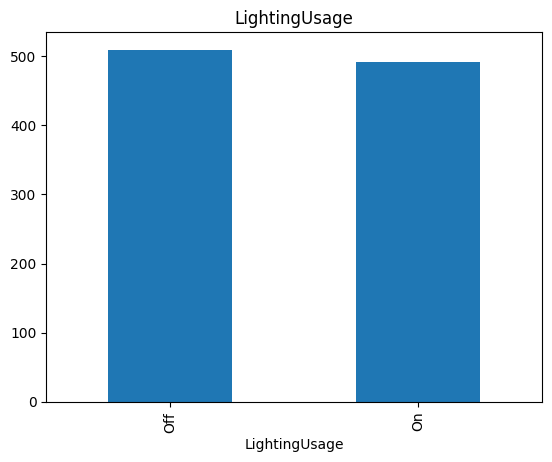

In [112]:
#Category Feature Lightning Usage
feature = cat_features[3]
count = df[feature].value_counts()
count.plot(kind='bar', title=feature)

# Insight
Dari Data Kategorikal yang disajikan dapat disimpulkan bahwa
- frekuensi dari penggunaan energi tidak pada hari libur tetapi pada hari kerja
- frekuensi hari paling banyak ada pada hari jumat
- frekuensi penggunaan HVAC dan LightningUsage juga paling banyak adalah off

# Analisis Variable Numerik
- untuk mengetahui distribusi data numerik apakah normal atau skewed
- mendeteksi outliers
- dan untuk mengetahui rentang nilai setiap variabel numerik

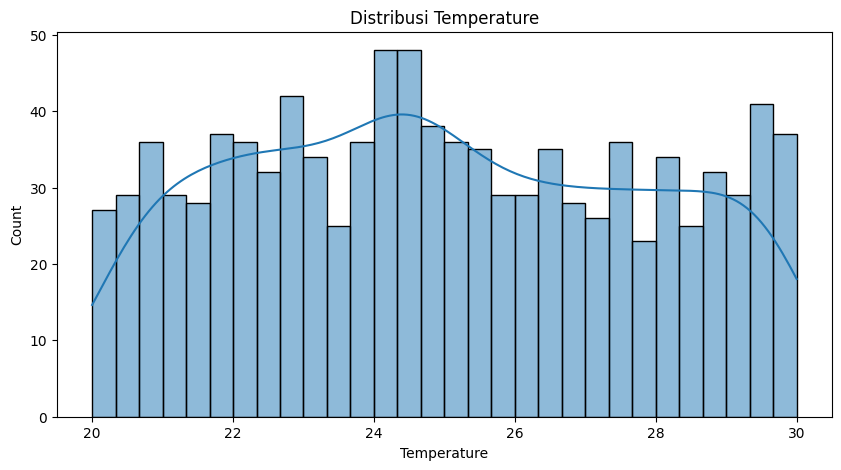

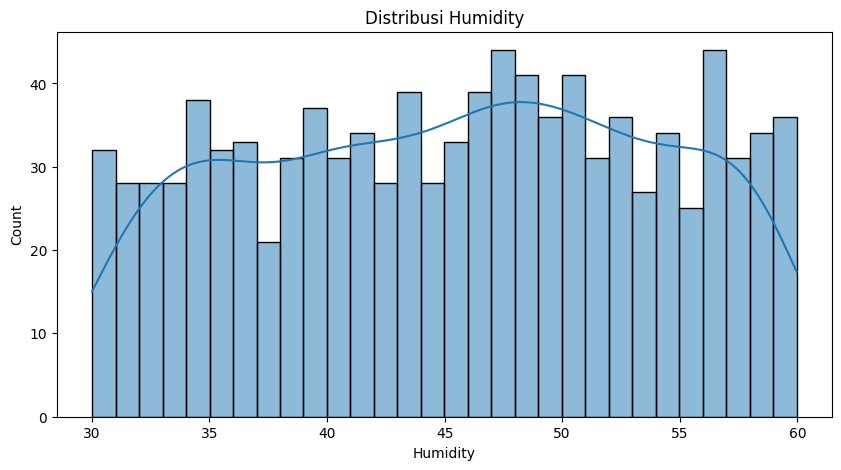

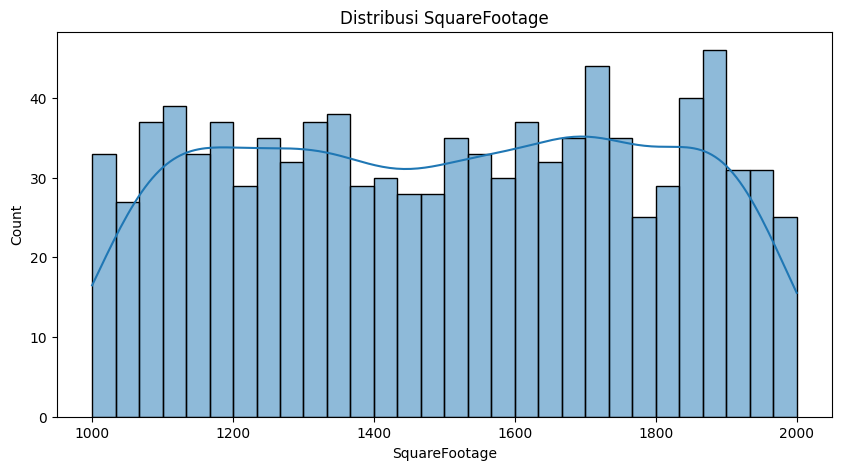

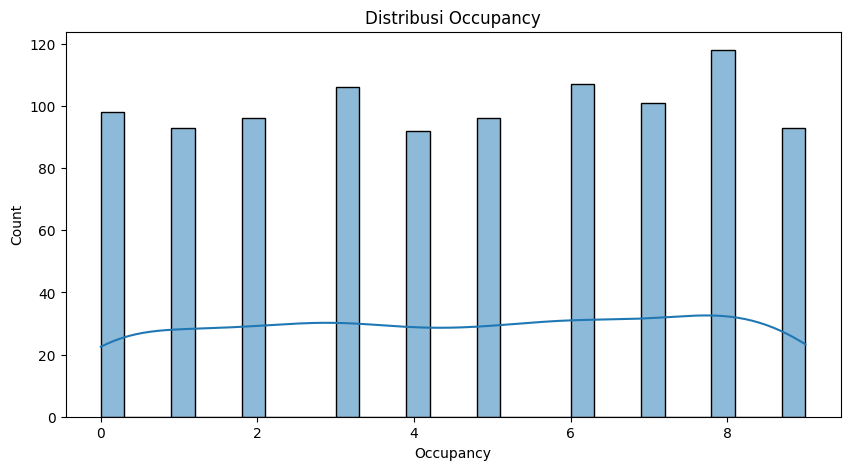

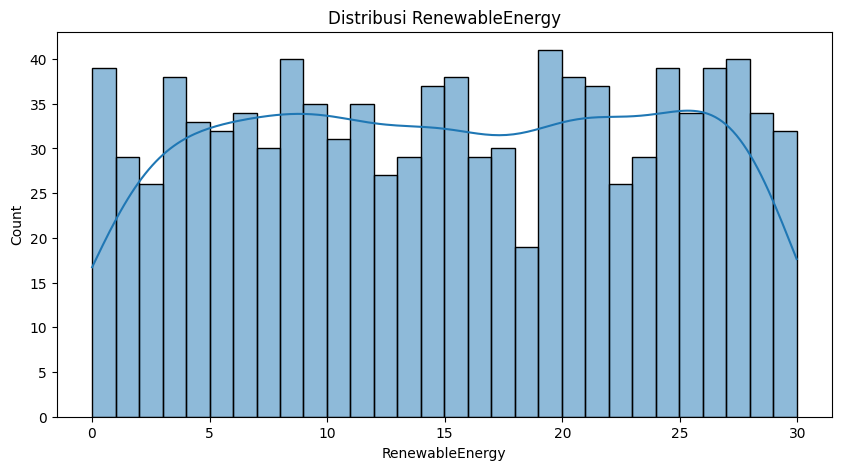

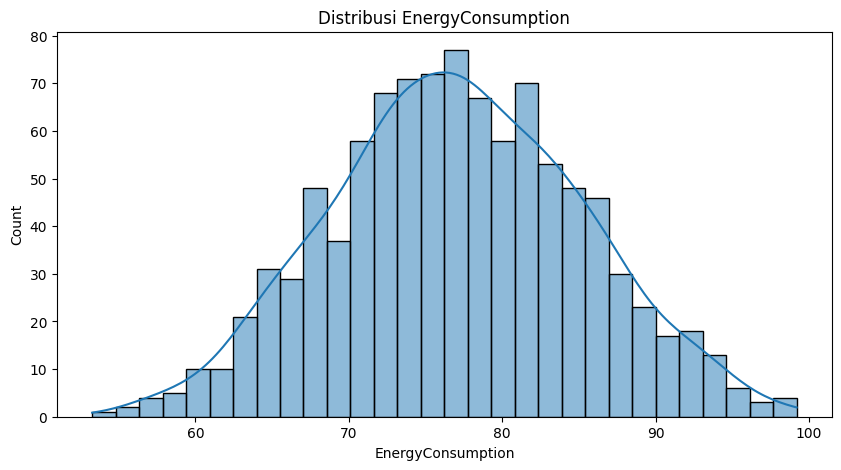

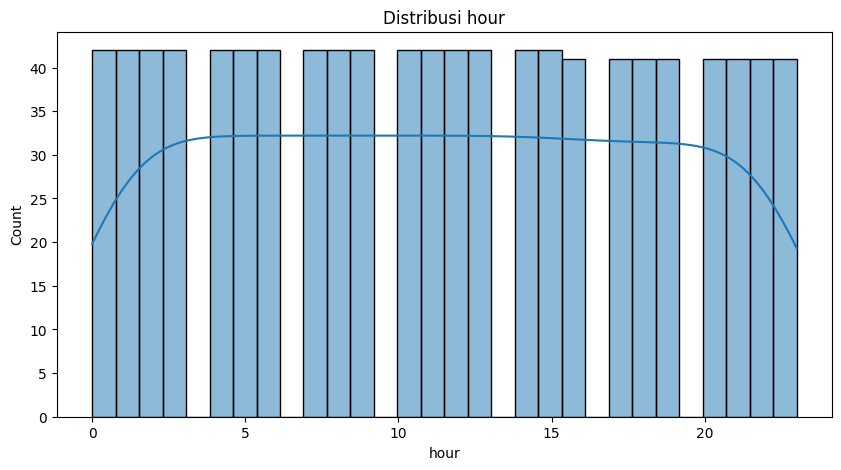

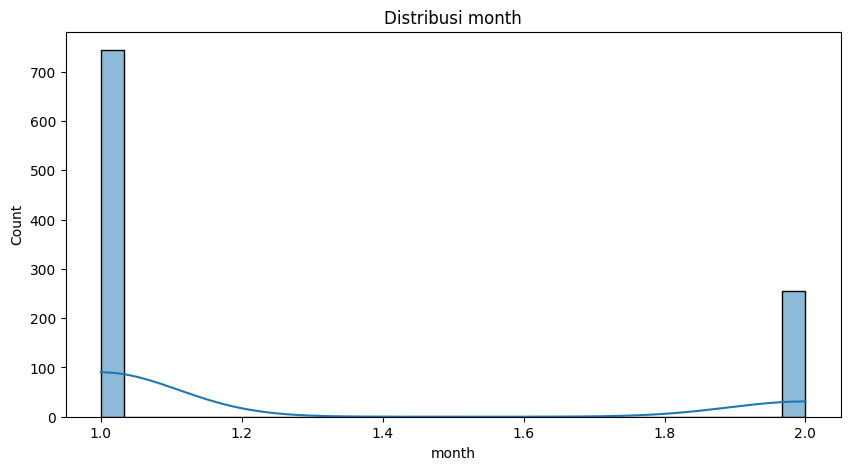

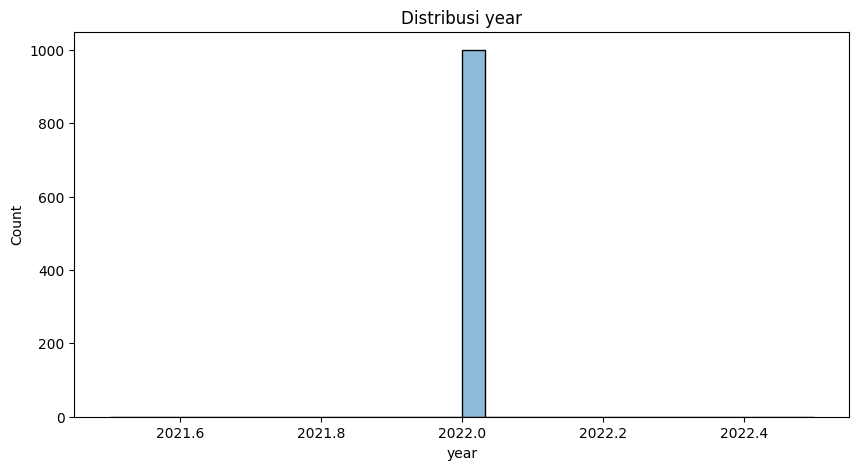

In [113]:
#For loop untuk analisis semua variable numerik
for col in nums_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Insight
Dari data diatas
- terdapat data yang uniform distribution seperti pada hours
- data seperti temperature, humidity dan squarefootage hampir seperti uniform distribution tetapi sedikit skewed/miring karena ada peak di sebelah kanan atau kiri
- data pada month dan year sangat sedikit yang memiliki kemungkinan besar tidak akan dijadikan fitur tetapi harus adanya analisis lanjut seperti matriks korelasi

# Exploratory Data Analysis - Multivariate Analysis

Analisis multivariasi bertujuan untuk
- mencari data kategorikal yang digabungkan ke data numerikal untuk mencari insight apakah ada data yang mempengaruhi energi consumption

<ipython-input-114-6bb87b45b640>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="EnergyConsumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-114-6bb87b45b640>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="EnergyConsumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-114-6bb87b45b640>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="EnergyConsumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, pa

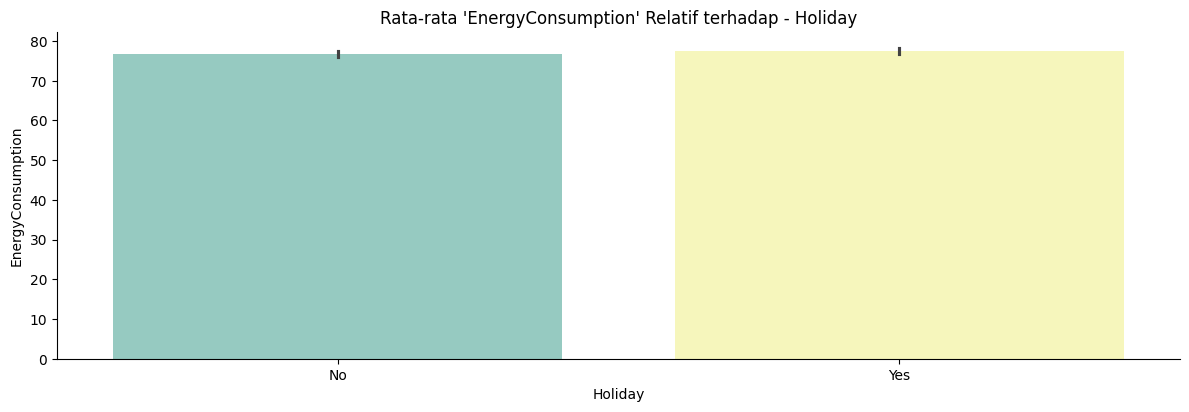

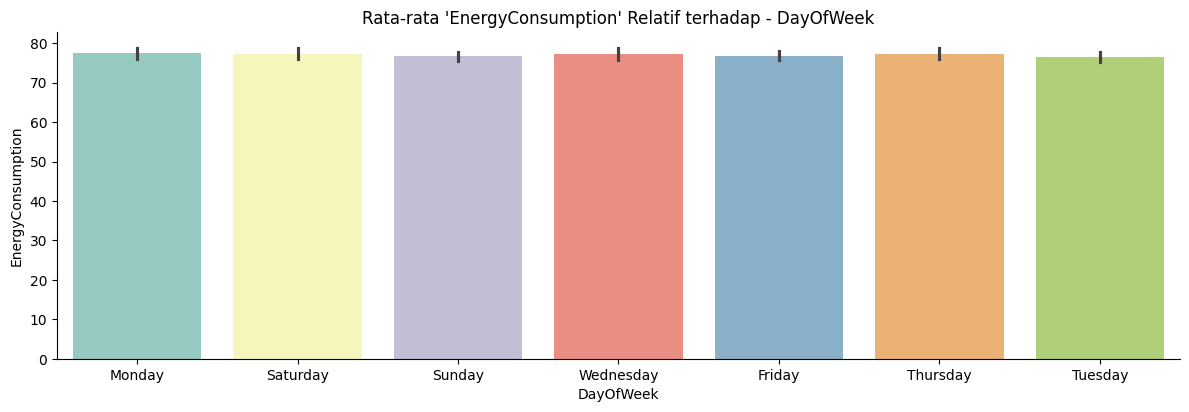

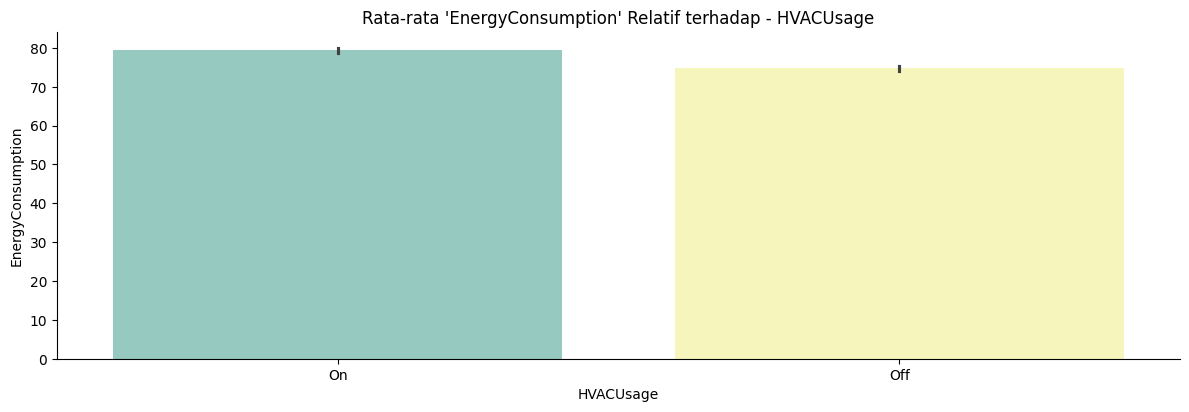

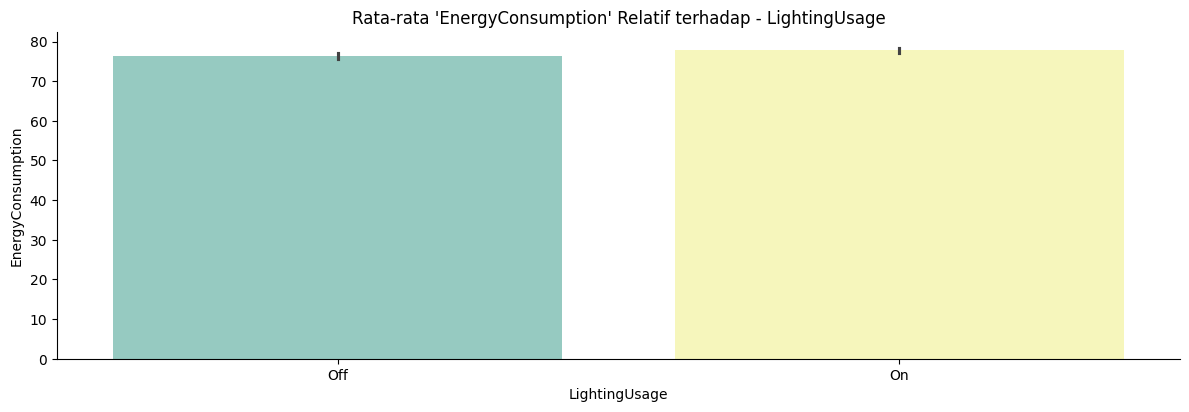

In [114]:
#Membuat for loop untuk analisis multivariasi
for col in cat_features:
  sns.catplot(x=col, y="EnergyConsumption", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'EnergyConsumption' Relatif terhadap - {}".format(col))

<Axes: xlabel='DayOfWeek'>

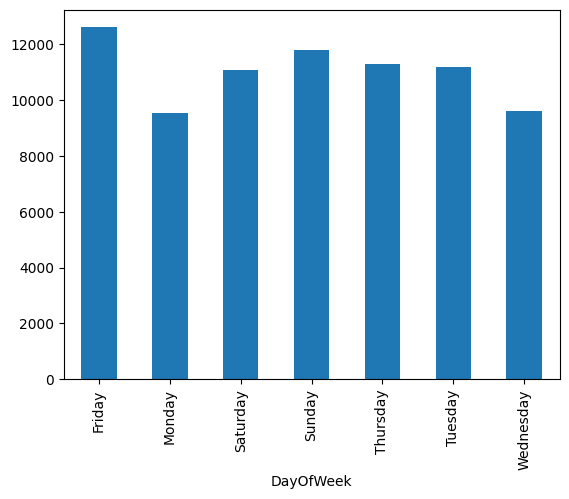

In [115]:
df.groupby('DayOfWeek')['EnergyConsumption'].sum().plot(kind='bar')

# Insight
Dari data yang disajikan terdapat beberapa fitur kategorikal yang mempengaruhi konsumsi energi seperti
- penggunaan HVAC(Heating, Ventilation, Air Conditioning) dalam kondisi on
- pengunaan lampu dalam kondisi off
- pengunaan yang paling besar adalah ketiga hari kerja dan bukan hari libur
- penggunaan yang paling besar ada di hari jumat

kesimpulannya penggunaan HVAC menjadi salah satu faktor karena banyaknya penggunaan HVAC, hari kerja juga menjadi salah satu faktor dimana hari jumat menjadi hari yang paling banyak menggunakan energi, walaupun pada data secara rata hari senin yang paling tinggi tetapi secara jumlah hari jumat lah dimana konsumsi tertinggi terjadi


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

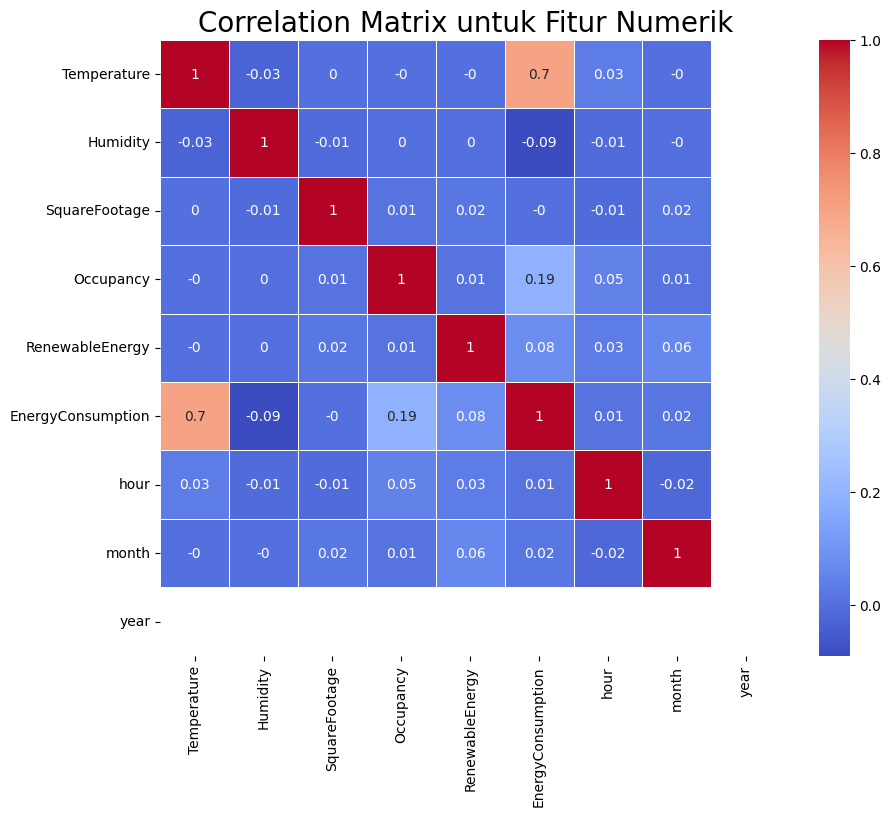

In [116]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[nums_features].corr().round(2)

# Untuk print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Insight
Dari matriks korelasi diatas terdapat bahwa
- konsumsi energi memiliki kaitan yang kuat dengan temperatur dan occupancy
- month dan year tidak terlalu berpengaruh dikarenakan hanya data hanya mengambil di tahun 2022 dan hanya pada bulan 1 dan awal bulan 2 saja

kesimpulan dengan eratnya kaitan temperatur dan konsumsi energi dapat dihubungkan dengan penggunaan HVAC dimana orang orang ketika temperatur panas atau dingin mereka menggunakan AC atau penghangat

#  Data Preparation

Sebelum data di training ada baiknya data harus dibersihkan, dinormalisasi, dan distandarisasi agar tidak ada kesalahan ketika modelling data

Sebelum memulai Data Preperation, ada baiknya mengcopy dataset agar dataset asli tidak berpengaruh. Jadi dataset yang digunakan untuk modelling merupakan dataset dummy

In [117]:
df_dummy = df.copy()
df_dummy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hour,month,year
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,0,1,2022
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,2022
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2,1,2022
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,3,1,2022
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,4,1,2022


**Penanganan Outliers**


penganganan outliers berguna ketika melakukan modelling data dimana terkadang ada algoritma yang sensitif terhadap noise atau outliers

In [118]:
#Menangani Outliers pada Energy Consumption

Q1 = df_dummy['EnergyConsumption'].quantile(0.25)
Q3 = df_dummy['EnergyConsumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_dummy = df_dummy[(df_dummy['EnergyConsumption'] >= lower_bound) & (df_dummy['EnergyConsumption'] <= upper_bound)]
df_dummy = df_dummy.reset_index(drop=True)

In [119]:
num_cols = df_dummy.select_dtypes(include='number').columns

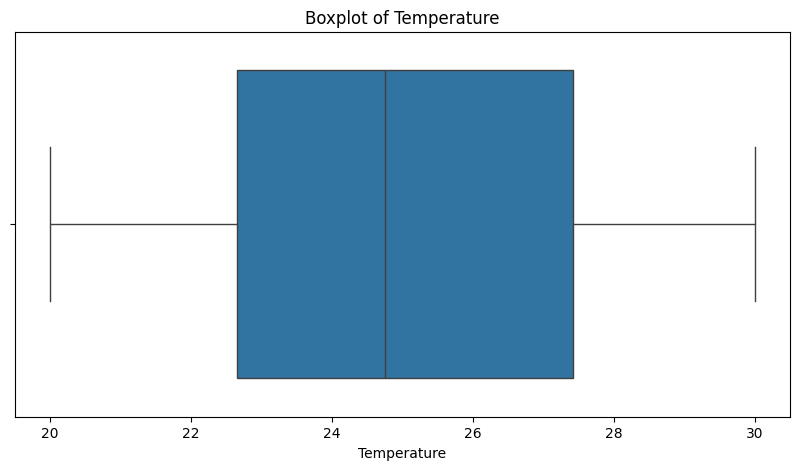

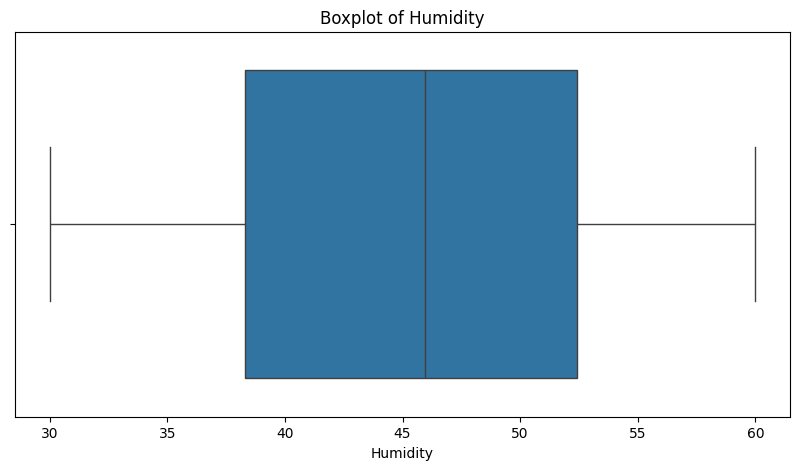

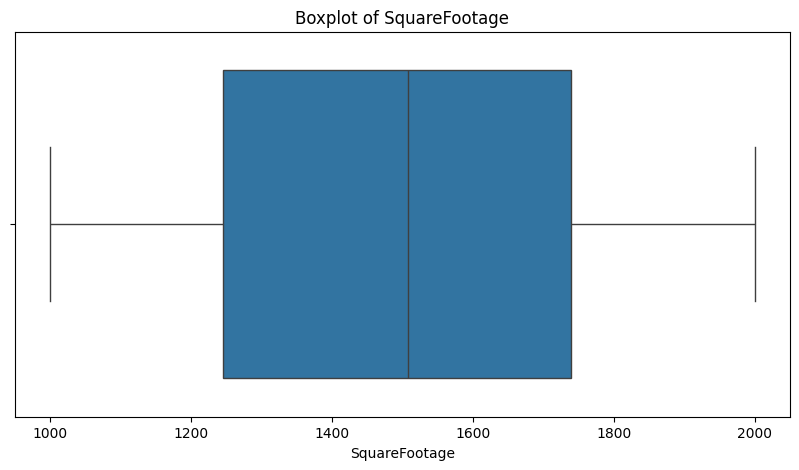

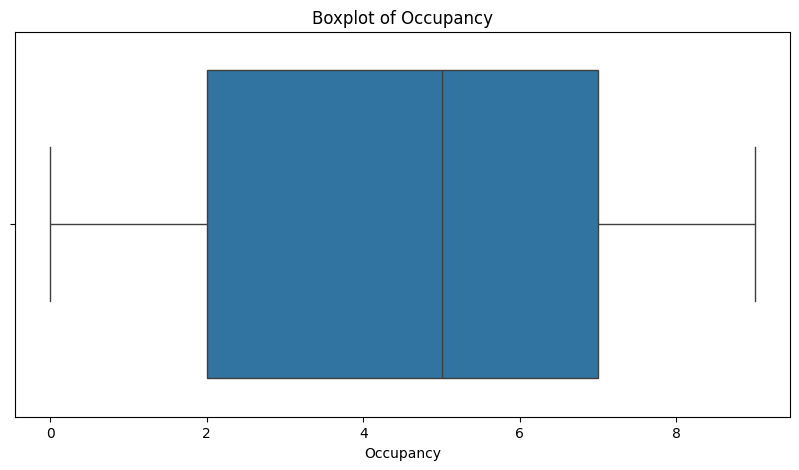

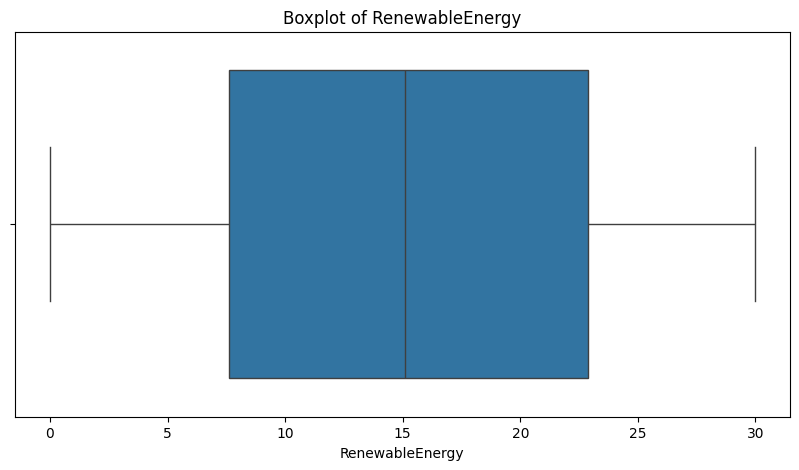

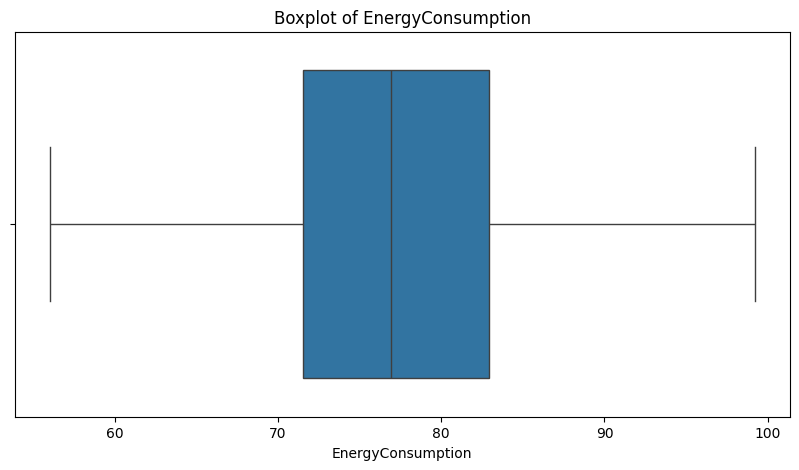

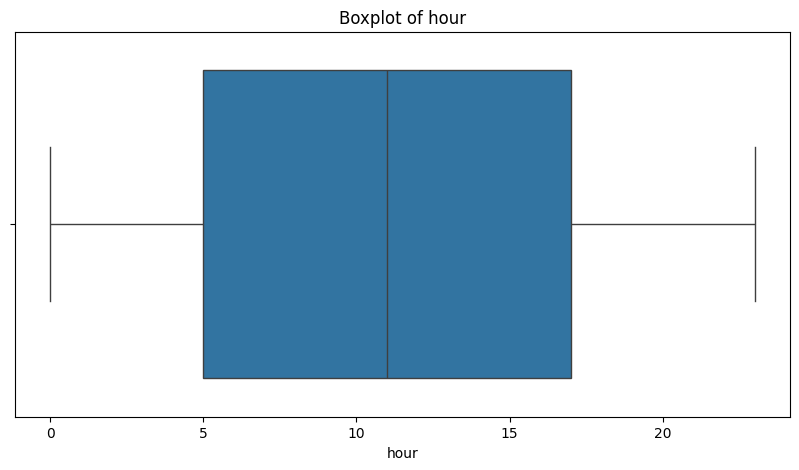

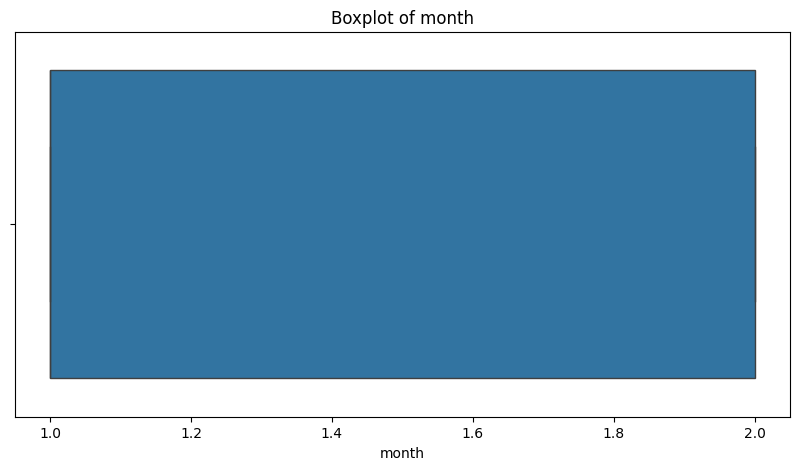

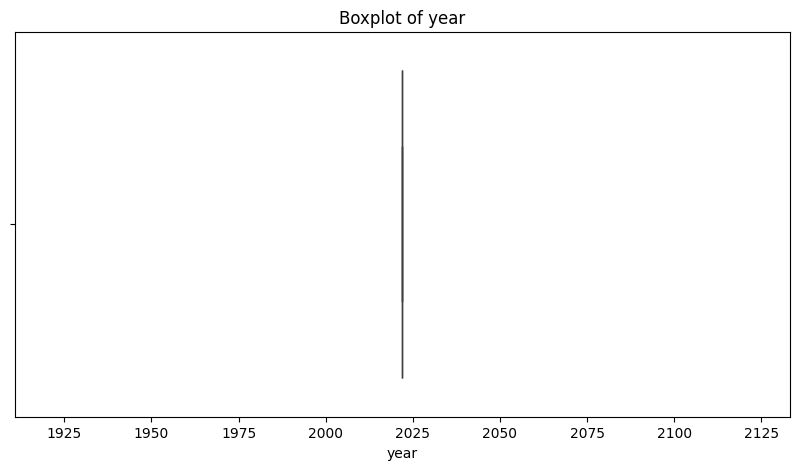

In [120]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_dummy[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [121]:
df_dummy.drop(['Timestamp','month', 'year'], axis=1, inplace=True)
df_dummy.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hour
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,0
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,3
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,4


Berdasarkan EDA yang dilakukan timestamp, month dan year merupakan variable yang tidak terlalu berguna ketika proses modelling maka dari itu melakukan drop pada variable tersebut menjadi langkah yang bagus

## One Hot Encoding

Setelah dilakukan salinan dataset menjadi dummy dataset data di pisahkan kembali dan di lakukan encoding dan di concat atau digabungkan ke dataset lalu kolom yang asli di drop agar tidak bertabrakan. Akan tetapi disini EnergyConsumption tidak dimasukan karena nanti itu akan menjadi variable tersendiri ketika melakukan modelling

In [122]:
#Melakukan Encoding dengan OneHotEncoder ke fitur Categorical
nums_features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'hour']
cat_features = ['Holiday', 'DayOfWeek', 'HVACUsage', 'LightingUsage']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df_dummy[cat_features])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_features), index=df_dummy.index)

df_dummy = pd.concat([df_dummy, encoded_df], axis=1)

df_dummy.drop(columns=cat_features, inplace=True)

df_dummy.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,hour,Holiday_No,Holiday_Yes,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,HVACUsage_Off,HVACUsage_On,LightingUsage_Off,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Standarisasi dengan StandardScaler

Berdasarkan EDA ada data yang sedikit skewed oleh karena itu dibutuhkannya standarisasi agar menjadi distribusi normal

In [123]:
#Melakukan Standarisasi ke fitur numerical
scaler = StandardScaler()
df_dummy[nums_features] = scaler.fit_transform(df_dummy[nums_features])
df_dummy.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,hour,Holiday_No,Holiday_Yes,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,HVACUsage_Off,HVACUsage_On,LightingUsage_Off,LightingUsage_On
0,0.054049,-0.230176,0.228915,0.146017,-1.413999,75.364373,-1.654475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.968842,1.037013,-0.307578,-1.249881,0.765411,83.401855,-1.509681,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.312082,1.586620,0.888202,-0.900906,-0.957687,78.270888,-1.364887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.731260,0.584544,-0.164454,-1.249881,-0.745109,56.519850,-1.220094,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.666599,0.705434,-1.407197,1.541915,-1.380002,70.811732,-1.075300,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Splitting Data

Splitting data digunakan untuk memisahkan data untuk training dan testing. Sebelum melakukan splitting data X dan Y harus ditentukan
- X : semua variable yang ada pada kolom kecuali EnergyConsumption
- Y : variable EnergyConsumption
karena tujuannya adalah untuk mencari prediksi konsumsi energi maka EnergyConsumption ada pada variable berbeda

In [124]:
X = df_dummy.drop(['EnergyConsumption'], axis=1)
y = df_dummy['EnergyConsumption']

In [125]:
#splitting train dan test data menjadi 80 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [126]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 999
Total # of sample in train dataset: 799
Total # of sample in test dataset: 200


# Modelling

Modelling menggunakan beberapa Algoritma:
- SVR : Support Vector Regressor
- RandomForest: Random Forest Regressor
- Gradient Boosting : Gradient Boosting Regressor
- XGBoost : XGB Regressor
- LightGBM : LGBM Regressor

semua algoritma menggunakan regressor karena ingin mencari prediksi secara regresi

In [127]:
models = {
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

Training menggunakan semua algoritma yang ada pada dictionary models lalu di simpan ke predictions dictionary untuk di evaluasi

In [128]:

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    predictions[name] = preds

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 799, number of used features: 19
[LightGBM] [Info] Start training from score 76.752514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

# Evaluasi Metrik (MAE, RMSE, dan $R^2$)

Metriks Evaluasi ketika melakukan algoritma Regresi merupakan MAE, RMSE, dan $R^2$

In [129]:
result_df = pd.DataFrame({
    'Actual': y_test.values
})
for name, preds in predictions.items():
    result_df[f'Predicted_{name}'] = preds

result_df.head()

,Actual,Predicted_SVR,Predicted_RandomForest,Predicted_GradientBoosting,Predicted_XGBoost,Predicted_LightGBM
0,64.076968,72.064604,70.792195,70.780469,71.691574,70.710983
1,65.288983,69.789510,69.394241,66.403749,65.445557,66.101020
2,62.055055,65.857925,66.998267,66.690196,64.931267,65.207126
3,77.627146,77.605104,78.298200,78.498151,79.137848,80.686157
4,80.003847,78.872098,80.239182,82.555790,80.094208,80.201911


# Visualisasi Prediksi

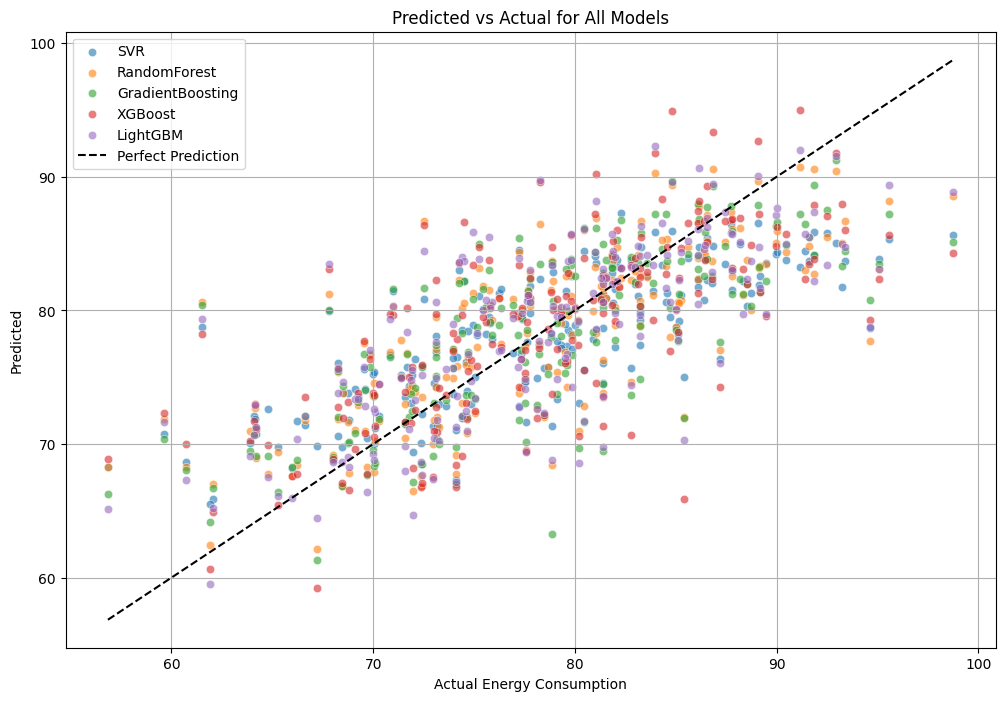

In [130]:
#visualisasi hasil prediksi dengan scatter plot
plt.figure(figsize=(12, 8))
for name in models.keys():
    sns.scatterplot(
        x=result_df['Actual'],
        y=result_df[f'Predicted_{name}'],
        label=name,
        alpha=0.6
    )

# Plot perfect prediction line
plt.plot([result_df['Actual'].min(), result_df['Actual'].max()],
         [result_df['Actual'].min(), result_df['Actual'].max()],
         'k--', label='Perfect Prediction')

plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual for All Models')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
#Memasukan Hasil dari result_df ke dalam metrics dictionary
metrics = {
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'R2': []
}

for name in models.keys():
    y_pred = result_df[f'Predicted_{name}']
    mae = mean_absolute_error(result_df['Actual'], y_pred)
    rmse = mean_squared_error(result_df['Actual'], y_pred)
    r2 = r2_score(result_df['Actual'], y_pred)

    metrics['Model'].append(name)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MAE,RMSE,R2
0,SVR,4.148621,26.680706,0.583187
1,RandomForest,4.046578,27.273958,0.573919
2,GradientBoosting,4.218489,28.254645,0.558598
3,XGBoost,4.398486,33.320127,0.479464
4,LightGBM,4.282458,30.710678,0.520229


# Insight
Dari hasil evaluasi metriks didapatkan hasil yang lumayan memuaskan
- Hasil MAE lumayan bagus yaitu pada 4.xxx dimana semakin dekat ke 0 semakin bagus

- RMSE hasilnya masih kurang memuaskan dimana RMSE menunjukan hasil yang sangat besar tetapi perlu diketahui bahwa RMSE dihitung berdasarkan target variable jika target variable berada di angka 100an maka ini termasuk bagus

- R2 hasilnya lumayan bagus karena semakin mendekati ke angka 1 walaupun masih berada di tengah tengah atau di angka 5

# Visualisasi MAE RMSE dan $R^2$

bertujuan untuk memvisualisasikan evaluasi dari setiap algoritma yang digunakan

<ipython-input-132-fb37b8d473d7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, palette='Blues_d')
<ipython-input-132-fb37b8d473d7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='Oranges_d')
<ipython-input-132-fb37b8d473d7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=metrics_df, palette='Greens_d')


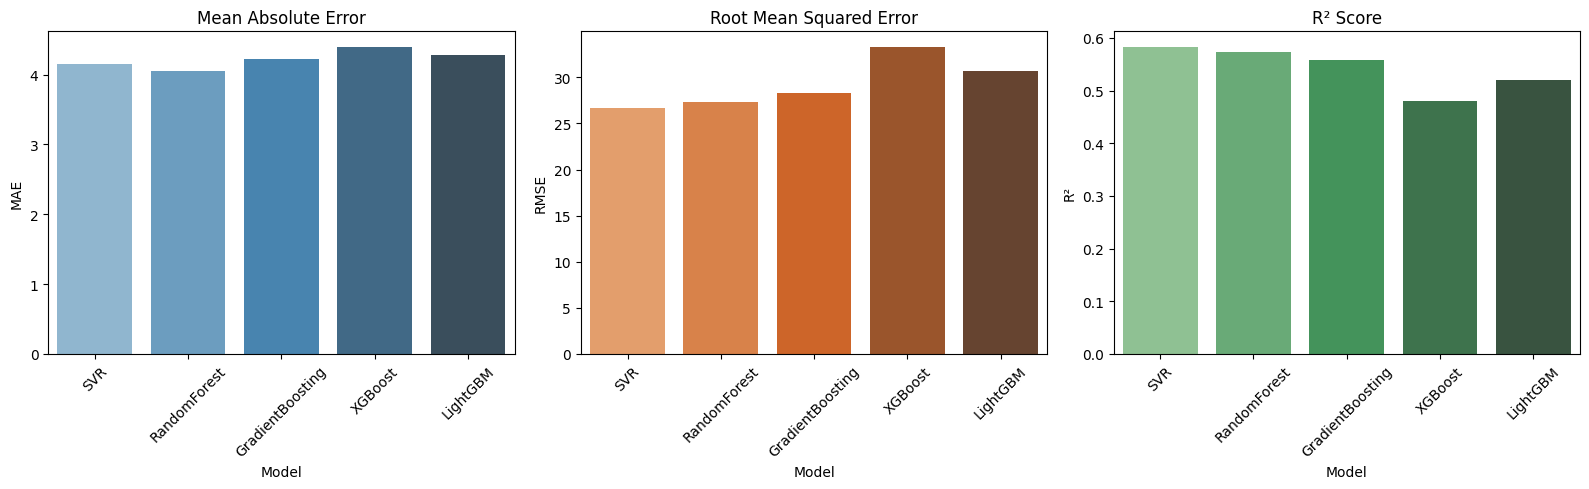

In [132]:
plt.figure(figsize=(16, 5))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='Blues_d')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# RMSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='Oranges_d')
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# R² Score
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=metrics_df, palette='Greens_d')
plt.title('R² Score')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [133]:
#menghitung relative MAE dan RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mean_target = y_test.mean()

print("Relative MAE (%):", mae / mean_target * 100)
print("Relative RMSE (%):", rmse / mean_target * 100)

Relative MAE (%): 5.463241167180853
Relative RMSE (%): 39.1784008485772


# Insight
- Dari Visualisasi, Dapat disimpulkan secara overall SVR memiliki performa yang lebih bagus dari yang lain dimana secara RMSE dan R2 skor lebih tinggi dari algoritma lain walaupun memiliki nilai yang sedikit lebih tinggi dari Random Forest
- Relative MAE dan RMSE menunjukan bahwa dari semua algoritma MAE memiliki nilai yang kecil dimana hanya 5% yang berarti **sangat bagus** dan RMSE yang lumayan besar di angka 39% yang dimana harus dibutuhkannya tuning lagi

# Saran
harus adanya hyperparameter tuning disetiap algortima yang dijalankan agar menghasilkan hasil yang terbaik

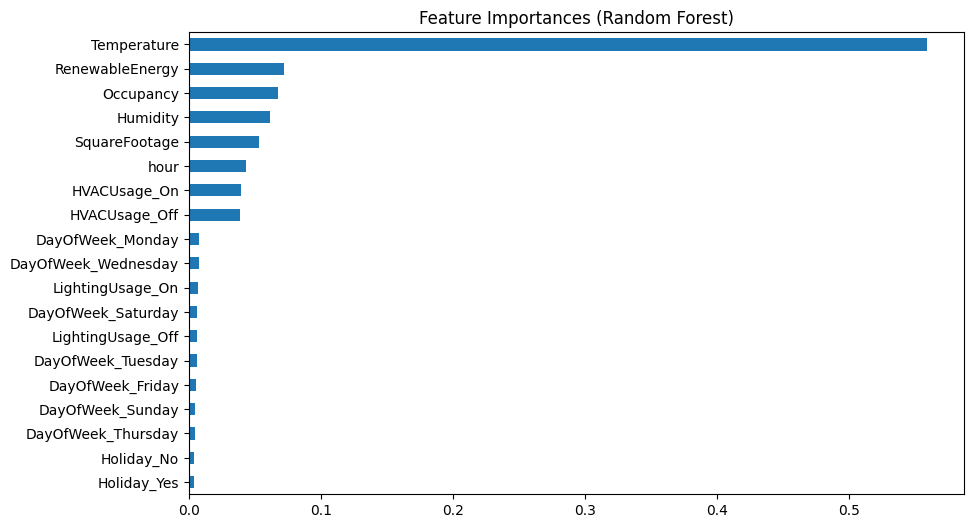

In [134]:
#Feature importance
model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

pd.Series(importances, index=feature_names).sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.show()

# Insight
berdasarkan feature importance dengan random forest dapat disimpulkan temperatur menjadi yang paling berpengaruh disusul oleh renewable energy,Occupancy, Humidity, SquareFootage, Hour, dan HVAC

# Kesimpulan
- Melonjaknya konsumsi energi salah satu faktor yang paling besar adalah temperatur dimana ketika temperatur panas atau dingin orang orang menyalakan HVAC yang mempengaruhi tingginya konsumsi energi selain itu occupancy dimana di satu bangunan terdapat banyak orang akan banyak juga yang menggunakan HVAC

- Model machine learning yang dibuat sudah cukup memuaskan walaupun belum bagus atau sempurna, sudah bisa memprediksi lonjakan permintaan energi dengan baik dengan SVR atau Suport Vector Regressor menjadi yang overall lebih baik dari algoritma lainnya.Saran kedepannya adalah menggunakan tuning hyperparameter